In [1]:
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

# Load the data arrays from the saved .npy files
data_blendshapes = np.load('./data/data_blendshapes.npy')
data_exp = np.load('./data/data_exp.npy')
data_pose = np.load('./data/data_pose.npy')
data_eye_pose = np.load('./data/data_eye_pose.npy')

print(data_blendshapes.shape)
print(data_exp.shape)
print(data_pose.shape)
print(data_eye_pose.shape)

(13962, 52)
(13962, 100)
(13962, 6)
(13962, 6)


In [2]:
# # Assuming data_blendshapes is an [N, 52] numpy array
# # Calculate the mean and standard deviation for each column
# means = np.mean(data_blendshapes, axis=0)
# stds = np.std(data_blendshapes, axis=0)

# # Perform z-score normalization
# data_blendshapes_normalized = (data_blendshapes - means) / stds

# Compute the pseudo-inverse of the blendshape scores data matrix
B_pinv = np.linalg.pinv(data_blendshapes)

# Compute the mappings
bs2exp = B_pinv @ data_exp
bs2pose = B_pinv @ data_pose
bs2eye = B_pinv @ data_eye_pose


In [3]:
from sklearn.linear_model import Ridge

# Initialize Ridge regression with a small alpha (regularization parameter)
ridge_exp = Ridge(alpha=0.1)
ridge_pose = Ridge(alpha=0.1)
ridge_eye = Ridge(alpha=0.1)

# Fit the ridge models
ridge_exp.fit(data_blendshapes, data_exp)
ridge_pose.fit(data_blendshapes, data_pose)
ridge_eye.fit(data_blendshapes, data_eye_pose)

# Extract the mappings
bs2exp = ridge_exp.coef_.T
bs2pose = ridge_pose.coef_.T
bs2eye = ridge_eye.coef_.T

In [5]:
# Save the mappings
np.save('./mappings/bs2exp.npy', bs2exp)
np.save('./mappings/bs2pose.npy', bs2pose)
np.save('./mappings/bs2eye.npy', bs2eye)


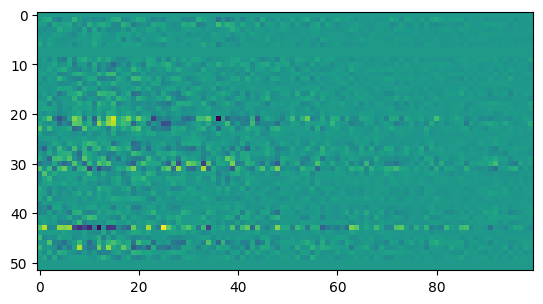

In [4]:
plt.imshow(bs2exp)